In [138]:
import math
import csv
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame
from matplotlib import pyplot as plt
import string
import re

#### Given a CSV data file as represented by the sample file GermanCredit.csv (1000 records), load it into a Pandas DataFrame, and perform the following tasks on it. ####

In [139]:
df_orignal = pd.read_csv(open('GermanCredit.csv'))
df_orignal

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


#### Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.) ####

In [140]:
df_orignal.replace('none', np.nan, inplace=True)

df_orignal
columns_to_drop = df_orignal.isna().sum()  #series of sums of total na values in each column. stored by going from left to right, so first coulmn is first entry(important for ties)
columns_to_drop.replace(0,np.nan,inplace=True) #replace all values of 0 with np.nan for easier future computation
columns_to_drop.dropna(inplace=True) #drop all NAN meaning drop all columns with no NAN
columns_to_drop.sort_values(ascending = False,inplace=True) # sort the Series based on values, in descencig order
thresh = 3 #change thresh value to change number of n column drops
columns_to_drop = columns_to_drop.head(thresh) 
columns_to_drop =  list(columns_to_drop.index) #list of column names to drop
df_orignal.drop(axis = 1, columns = columns_to_drop,inplace =True)
df_orignal

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',4,'real estate',31,own,1,'unskilled resident',1,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',4,'life insurance',40,own,1,'high qualif/self emp/mgmt',1,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',4,car,38,own,1,skilled,1,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',4,'no known property',23,'for free',1,skilled,1,yes,bad


#### Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes. ####

In [141]:
df_orignal.replace(regex=True,to_replace="'", value='',inplace = True)
#"'" in  df_orignal #check if apostrophy anywhere in dataframe

#### The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively. ####

In [142]:
changedic={'no checking':'No Checking', '<0':'Law','0<=X<200':'Medium','>=200':'High'} #dic to hold replacement vlaues
df_orignal['checking_status'].replace(changedic,inplace = True) #replace from dictionary
print(df_orignal.checking_status.value_counts()) #all values changed?
df_orignal

No Checking    394
Law            274
Medium         269
High            63
Name: checking_status, dtype: int64


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Law,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Law,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Law,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Law,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Law,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


#### The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High'). ####

In [143]:
changedic={'no known savings':'No Savings', '<100':'Low','100<=X<500':'Medium','500<=X<1000':'High','>=1000':'High'} #dic for replacements
df_orignal['savings_status'].replace(changedic,inplace = True) #change from dic
print(df_orignal.savings_status.value_counts()) #all values changed?
df_orignal

Low           603
No Savings    183
High          111
Medium        103
Name: savings_status, dtype: int64


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Law,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Law,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Law,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Law,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Law,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


#### Change class column values from 'good' to '1' and 'bad' to '0'. ####

In [144]:
changedic={'good':'1', 'bad':'0'}
df_orignal['class'].replace(changedic,inplace = True)
print(df_orignal['class'].value_counts()) #all values changed?
df_orignal

1    700
0    300
Name: class, dtype: int64


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Law,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Law,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Law,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Law,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Law,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


#### Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range ####

In [145]:
def employment_cleaner(row): #take in as string
                            #less than 1 is amature
                            #1 to 4(not included) is pro
                            #4 to 7(not included) is experienced
                            #greater than 7 is expert

    emp_range = str(row[6]) 
    if re.match(emp_range , r'>=7') != None: 
        row[6] = 'Expert'

    if re.match(emp_range , r'1<=X<4') != None:
        row[6] = 'Professional'

    if re.match(emp_range , r'<1') != None: 
        row[6] = 'Amateur'

    if re.match(emp_range , r'4<=X<7') != None:
        row[6] = 'Experienced'

    return row
            
df_orignal = df_orignal.apply(lambda row : employment_cleaner(row) ,axis = 1)

print(df_orignal.employment.value_counts()) #verify total is 1000 to make sure all values have been changed
df_orignal

Professional    339
Expert          253
Experienced     174
Amateur         172
unemployed       62
Name: employment, dtype: int64


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Law,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Law,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Law,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Law,30,existing paid,used car,3857,Low,Professional,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Law,45,existing paid,radio/tv,1845,Low,Professional,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


#### Often we need to find correlations between categorical attributes, i.e. attributes that have values that fall in one of several categories, such as "yes"/"no" for attr1, or "low","medium","high" for attr2. 
One such correlation is to find counts in combinations of categorial values across attributes, as in how many instances are "yes" for attr1 and "low" for attr2. A good way to find such counts is to use the Pandas crosstab function. Do this for the following two counts. 

#### Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad). ####

In [146]:
pd_temp = pd.crosstab(df_orignal['class'],df_orignal.foreign_worker)

#customizing table for readability
pd_temp.rename(index = {'0':'Bad','1':'Good'},inplace = True)
pd_temp.rename(columns = {'no':'No', 'yes':'Yes'},inplace = True)
pd_temp.rename_axis(index = 'Class',columns = 'Foreign Worker?',inplace = True)
pd_temp

Foreign Worker?,No,Yes
Class,,
Bad,4,296
Good,33,667


#### Similarly, get the count of each category of employment for each category of saving_status. ####

In [147]:
pd_temp = pd.crosstab(df_orignal.savings_status,df_orignal.employment)

#customizing table for readability
pd_temp.rename_axis(index = 'Savings Status',columns = 'Employment Level',inplace = True)
pd_temp

Employment Level,Amateur,Experienced,Expert,Professional,unemployed
Savings Status,,,,,
High,12,18,34,44,3
Low,120,100,133,210,40
Medium,17,24,22,33,7
No Savings,23,32,64,52,12


#### Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding. ####

In [148]:
ExperiencedMales = df_orignal[df_orignal['personal_status'] == 'male single'] #if single male add row to new df
ExperiencedMales = ExperiencedMales[ExperiencedMales['employment'] == 'Experienced'] #if experienced...
avg_savings = ExperiencedMales['credit_amount'].mean() #calculate mean using only 'credit amount' cloumn
print(avg_savings)

4142.592592592592


#### Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding. ####

In [149]:
df_orignal.groupby(['job'])['duration'].mean() #group data frame by each job type, and get the mean of all the values in that job type

job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64

#### For the purpose 'education', what is the most common checking_status and savings_status? ####

In [150]:
temp = pd.DataFrame(data = df_orignal, columns = ['purpose','checking_status', 'savings_status'])
#df_orignal.groupby(['checking_status'])['checking_status'].count()
temp = temp[temp['purpose']=='education'] #get rows that have eduaction in purpose column
temp.drop(columns = 'purpose',inplace = True) #drop purpose coulmn since all coulmns will be 'eduaction'
print('Most common checking status: ', (temp.checking_status.mode().values)) #print most common checking status 
print('Most common savings status: ', (temp.savings_status.mode().values)) #print most savings checking status

Most common checking status:  ['No Checking']
Most common savings status:  ['Low']


#### Visualization ####

#### Plot subplots of two bar charts: one for savings_status (x-axis) to personal status (y-axis), and another for checking_status (x-axis) to personal_status (y-axis). In each of the charts, each personal status category bar (number of people in that category) should be of a different color. ####

Text(0.5, 0, 'Saving Status')

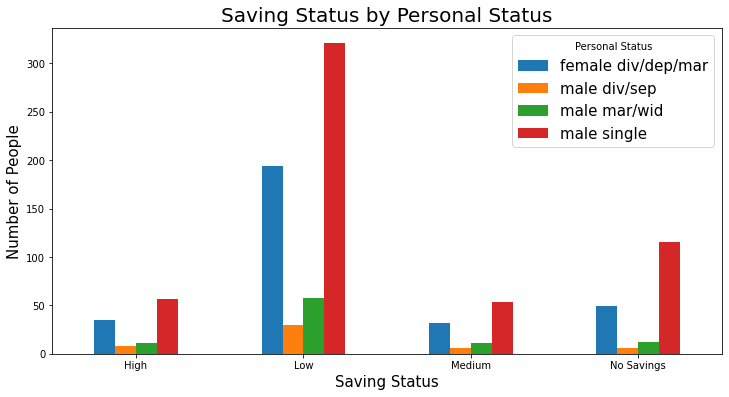

In [151]:
tempdfe = df_orignal.get(['personal_status','savings_status'])
tempdfe=tempdfe.groupby(['personal_status'])['savings_status'].value_counts()
savings = tempdfe.unstack(level=0).plot(kind = 'bar',rot = 0,legend = True,figsize = (12,6))
savings.set_ylabel('Number of People',fontsize = 15)
savings.legend(title = 'Personal Status',fontsize = 15)
savings.set_title('Saving Status by Personal Status',fontsize =20 )
savings.set_xlabel('Saving Status',fontsize = 15)

Text(0.5, 0, 'Checkings Status')

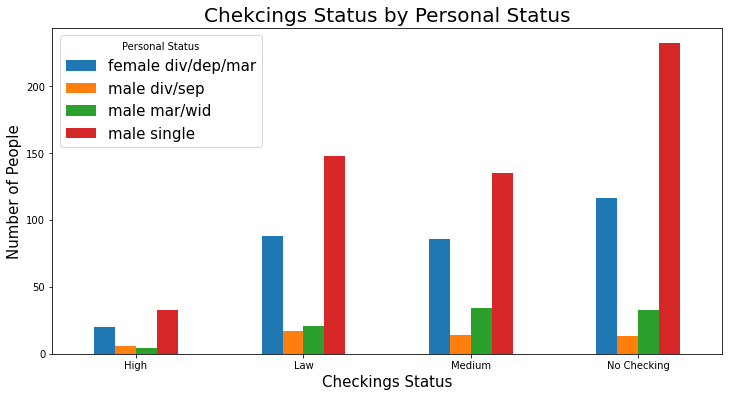

In [152]:
tempdfe = df_orignal.get(['personal_status','checking_status'])
tempdfe=tempdfe.groupby(['personal_status'])['checking_status'].value_counts()
checkings = tempdfe.unstack(level=0).plot(kind = 'bar',rot = 0,legend = True,figsize = (12,6))
checkings.set_ylabel('Number of People',fontsize = 15)
checkings.legend(title = 'Personal Status',fontsize = 15)
checkings.set_title('Chekcings Status by Personal Status',fontsize =20 )
checkings.set_xlabel('Checkings Status',fontsize = 15)

#### For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis) ####

In [153]:
tempdf = df_orignal[df_orignal['credit_amount']>4000] #246 entries for this subframe
tempdf = pd.DataFrame(data = tempdf, columns =['property_magnitude','age'])
tempdf=pd.DataFrame(tempdf.groupby(['property_magnitude'])['age'].mean())
tempdf

,age
property_magnitude,
car,32.204301
life insurance,35.379310
no known property,42.157143
real estate,35.720000


Text(0.5, 1.0, 'Property Magnitude vs Average Age')

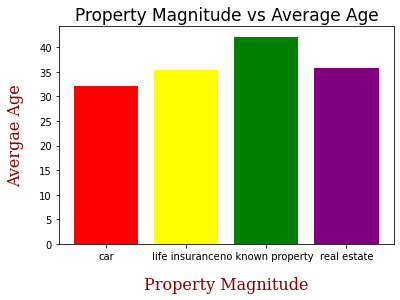

In [154]:
plt.bar(tempdf.index,tempdf.age,color = ['red','yellow','green','purple'])
#
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.xlabel('Property Magnitude',labelpad = 15,fontdict = font)
plt.ylabel('Avergae Age',labelpad = 15,fontdict = font)
plt.xticks(fontsize = 10,)
plt.title('Property Magnitude vs Average Age',fontsize = 17)

figfig#### For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:
Personal status
Credit history
Job


In [155]:
tempdf = df_orignal[df_orignal['age']>40] #filter greater than 40
tempdf = tempdf[tempdf['savings_status'] == 'High'] #filter saving status
#tempdf

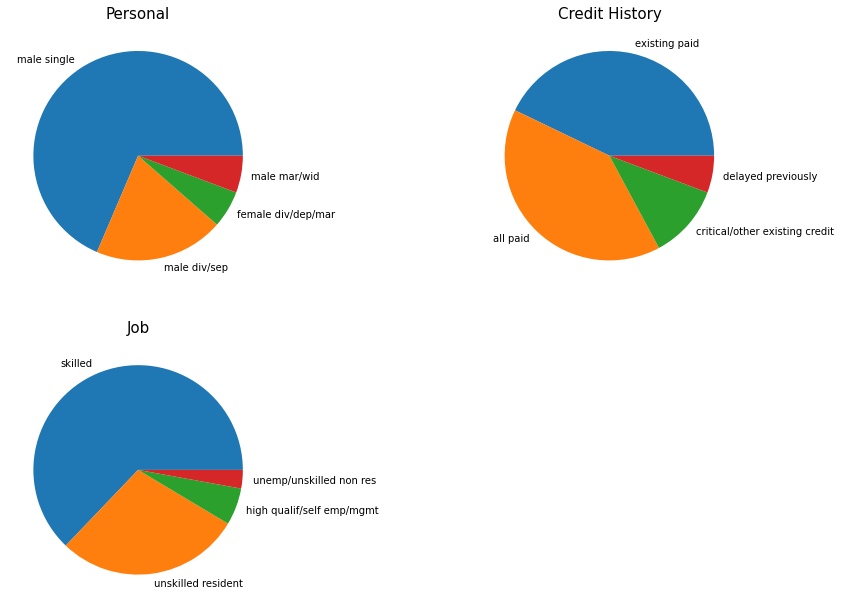

In [156]:
plt.subplot(2,2,1)
plt.pie(tempdf.personal_status.value_counts(), labels = tempdf.personal_status.unique(), radius = 1, )
plt.title('Personal', fontsize = 15)

plt.subplot(2,2,2)
plt.pie(tempdf.credit_history.value_counts(), labels = tempdf.credit_history.unique(), radius = 1)
plt.title('Credit History', fontsize = 15)

plt.subplot(2,2,3)
plt.pie(tempdf.job.value_counts(), labels = tempdf.job.unique(), radius = 1)
plt.title('Job', fontsize = 15)

plt.subplots_adjust(left= 0,right = 2,top = 3,bottom = 1 ) #radiblity adjustments